In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_column",None)
df = pd.read_csv("UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<b>ID </b>: ID of each client <br/>
<b>LIMIT_BAL</b>: Amount of given credit in NT dollars (includes individual and family/supplementary credit <br/>
<b>SEX</b>: Gender (1=male, 2=female) <br/>
<b>EDUCATION </b>: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) <br/>
<b>MARRIAGE </b>: Marital status (1=married, 2=single, 3=others) <br/>
<b>AGE</b> : Age in years <br/>
<b>PAY_0</b> : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above) <br/>
<b>PAY_2 </b>: Repayment status in August, 2005 (scale same as above) <br/>
<b>PAY_3</b> : Repayment status in July, 2005 (scale same as above) <br/>
<b>PAY_4</b> : Repayment status in June, 2005 (scale same as above) <br/>
<b>PAY_5</b> : Repayment status in May, 2005 (scale same as above) <br/>
<b>PAY_6</b> : Repayment status in April, 2005 (scale same as above) <br/>
<b>BILL_AMT1</b> : Amount of bill statement in September, 2005 (NT dollar) <br/>
<b>BILL_AMT2</b> : Amount of bill statement in August, 2005 (NT dollar) <br/>
<b>BILL_AMT3</b> : Amount of bill statement in July, 2005 (NT dollar) <br/>
<b>BILL_AMT4</b> : Amount of bill statement in June, 2005 (NT dollar) <br/>
<b>BILL_AMT5</b> : Amount of bill statement in May, 2005 (NT dollar) <br/>
<b>BILL_AMT6</b> : Amount of bill statement in April, 2005 (NT dollar) <br/>
<b>PAY_AMT1</b> : Amount of previous payment in September, 2005 (NT dollar) <br/>
<b>PAY_AMT2</b> : Amount of previous payment in August, 2005 (NT dollar) <br/>
<b>PAY_AMT3</b> : Amount of previous payment in July, 2005 (NT dollar) <br/>
<b>PAY_AMT4</b> : Amount of previous payment in June, 2005 (NT dollar) <br/>
<b>PAY_AMT5</b> : Amount of previous payment in May, 2005 (NT dollar) <br/>
<b>PAY_AMT6</b> : Amount of previous payment in April, 2005 (NT dollar) <br/>
<b>default.payment.next.month</b> : Default payment (1=yes, 0=no) <br/>

In [3]:
df.shape

(30000, 25)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


The negative values represent a delay or a past-due status.

The column PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6 represent  in payement in month september,August,July,june,may,april. we can rename  to make it simple by replacing. Also column default.payment.next.month can be changed to def_pay.

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [6]:
df.rename(columns={
    'PAY_0':"PAY_sep",
    'PAY_2' : 'PAY_aug',
    'PAY_3' : 'PAY_july',
    'PAY_4' : 'PAY_june',
    'PAY_5' : 'PAY_may',
    'PAY_6' : 'PAY_april',
    'BILL_AMT1':'BILL_sep',
    'BILL_AMT2':'BILL_aug',
    'BILL_AMT3':'BILL_july',
    'BILL_AMT4':'BILL_june', 
    'BILL_AMT5':'BILL_may', 
    'BILL_AMT6':'BILL_april',
    'PAY_AMT1':'PREV_PAY_sep', 
    'PAY_AMT2':'PREV_PAY_aug',
    'PAY_AMT3':'PREV_PAY_july',
    'PAY_AMT4':'PREV_PAY_june', 
    'PAY_AMT5':'PREV_PAY_may', 
    'PAY_AMT6':'PREV_PAY_april',               
    'default.payment.next.month':"def_pay",
     },inplace = True)


In [7]:
#checking the null present in data
df.isnull().sum()

ID                0
LIMIT_BAL         0
SEX               0
EDUCATION         0
MARRIAGE          0
AGE               0
PAY_sep           0
PAY_aug           0
PAY_july          0
PAY_june          0
PAY_may           0
PAY_april         0
BILL_sep          0
BILL_aug          0
BILL_july         0
BILL_june         0
BILL_may          0
BILL_april        0
PREV_PAY_sep      0
PREV_PAY_aug      0
PREV_PAY_july     0
PREV_PAY_june     0
PREV_PAY_may      0
PREV_PAY_april    0
def_pay           0
dtype: int64

In [8]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   SEX             30000 non-null  int64  
 3   EDUCATION       30000 non-null  int64  
 4   MARRIAGE        30000 non-null  int64  
 5   AGE             30000 non-null  int64  
 6   PAY_sep         30000 non-null  int64  
 7   PAY_aug         30000 non-null  int64  
 8   PAY_july        30000 non-null  int64  
 9   PAY_june        30000 non-null  int64  
 10  PAY_may         30000 non-null  int64  
 11  PAY_april       30000 non-null  int64  
 12  BILL_sep        30000 non-null  float64
 13  BILL_aug        30000 non-null  float64
 14  BILL_july       30000 non-null  float64
 15  BILL_june       30000 non-null  float64
 16  BILL_may        30000 non-null  float64
 17  BILL_april      30000 non-null 

our entire dataset is numerical so no need to do encoding also there is no null values in the dataset so need imputation.

since it's a classification problem, we need to know either our data is balanced or not, to solve the problem of biasness.

In [9]:
df['def_pay'].value_counts()

0    23364
1     6636
Name: def_pay, dtype: int64

it shows our dataset is imbalanced

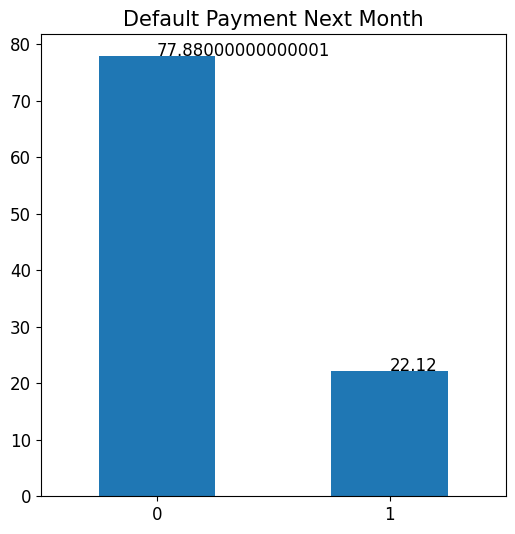

In [10]:
def_ = (df.def_pay.value_counts(normalize=True)*100)
def_.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Default Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_):
    plt.text(x,y,y,fontsize=12)
plt.show()

We can see that the dataset consists of 77% clients are not expected to default payment whereas 22% clients are expected to default the payment.

In [11]:
df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_sep,PAY_aug,PAY_july,PAY_june,PAY_may,PAY_april,BILL_sep,BILL_aug,BILL_july,BILL_june,BILL_may,BILL_april,PREV_PAY_sep,PREV_PAY_aug,PREV_PAY_july,PREV_PAY_june,PREV_PAY_may,PREV_PAY_april,def_pay
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_sep,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_aug,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_july,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_june,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


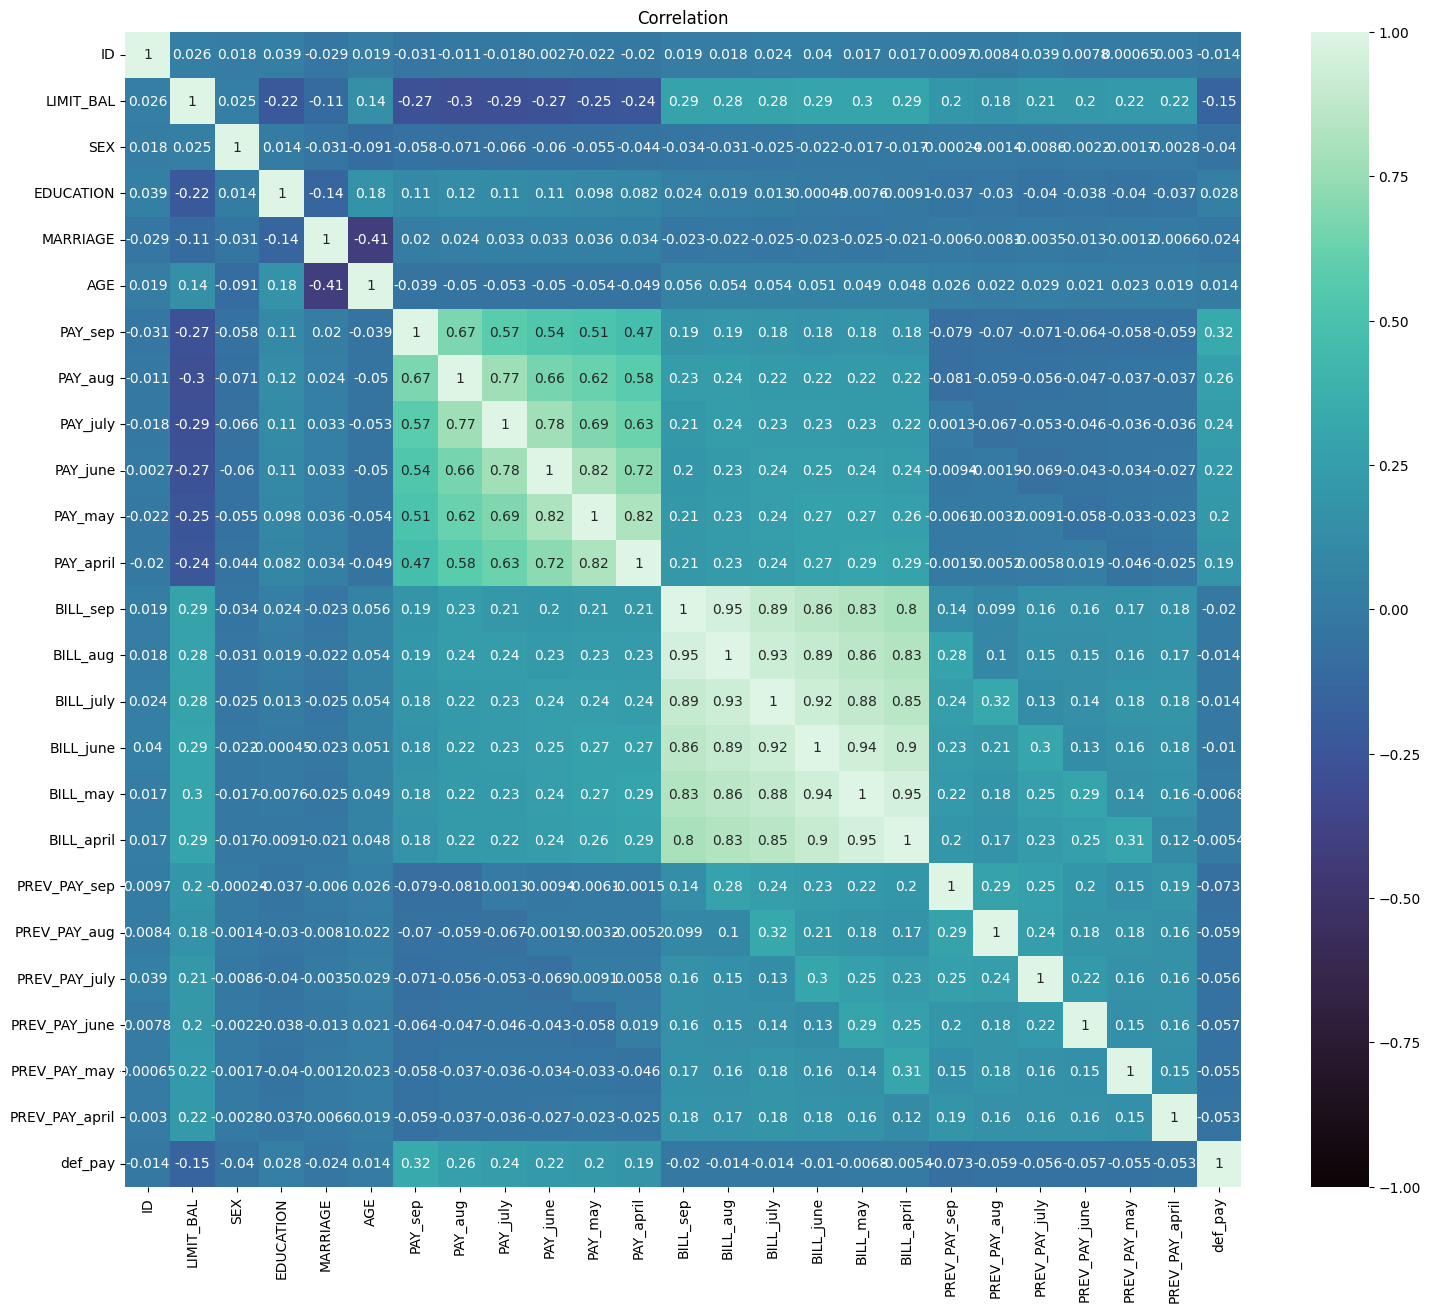

In [12]:
corr= df.corr()

#Plot heatmap
plt.figure(figsize=(18,15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap ='mako')
plt.title('Correlation')
plt.show()

In [13]:
correlation_matrix = df.corr()

# Identify pairs of variables with correlation greater than 0.6
high_correlation_pairs = (correlation_matrix.abs() > 0.6) 

# Extract the variable pairs with correlation greater than 0.6
high_correlation_variables = []

for col in high_correlation_pairs.columns:
    correlated_vars = list(high_correlation_pairs.index[high_correlation_pairs[col]])
    for var in correlated_vars:
        if high_correlation_pairs.loc[var, col]:
            high_correlation_variables.append((var, col))

# Display the variable pairs and their correlation coefficients
for var1, var2 in high_correlation_variables:
    correlation_coefficient = correlation_matrix.loc[var1, var2]
    print(f"{var1} and {var2}: {correlation_coefficient}")

ID and ID: 1.0
LIMIT_BAL and LIMIT_BAL: 1.0
SEX and SEX: 1.0
EDUCATION and EDUCATION: 1.0
MARRIAGE and MARRIAGE: 1.0
AGE and AGE: 1.0
PAY_sep and PAY_sep: 1.0
PAY_aug and PAY_sep: 0.6721643825483142
PAY_sep and PAY_aug: 0.6721643825483142
PAY_aug and PAY_aug: 1.0
PAY_july and PAY_aug: 0.7665516829341017
PAY_june and PAY_aug: 0.6620671310239591
PAY_may and PAY_aug: 0.6227802453768703
PAY_aug and PAY_july: 0.7665516829341017
PAY_july and PAY_july: 1.0
PAY_june and PAY_july: 0.7773588733012726
PAY_may and PAY_july: 0.6867745109947853
PAY_april and PAY_july: 0.6326835927184455
PAY_aug and PAY_june: 0.6620671310239591
PAY_july and PAY_june: 0.7773588733012726
PAY_june and PAY_june: 1.0
PAY_may and PAY_june: 0.8198353114868158
PAY_april and PAY_june: 0.7164494815807845
PAY_aug and PAY_may: 0.6227802453768703
PAY_july and PAY_may: 0.6867745109947853
PAY_june and PAY_may: 0.8198353114868158
PAY_may and PAY_may: 1.0
PAY_april and PAY_may: 0.8169001604176753
PAY_july and PAY_april: 0.63268359271

The positive sign (0.672) indicates a positive correlation, meaning that as the values of september increase, the values of august also tend to increase.

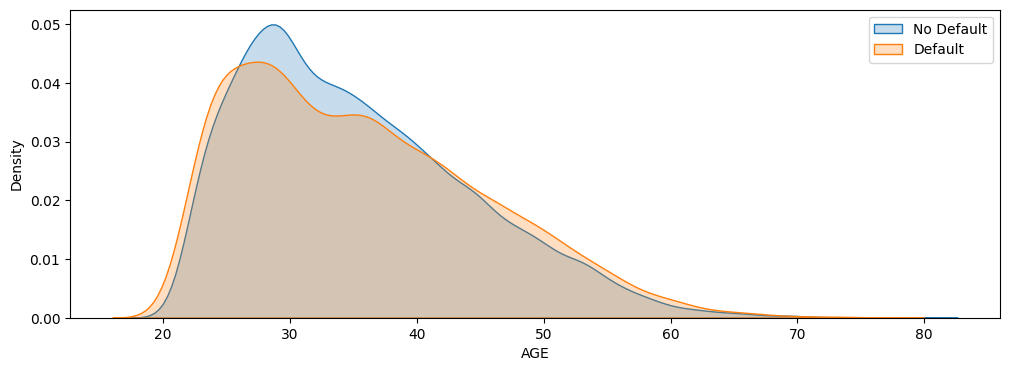

In [14]:
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['def_pay'] == 0), 'AGE'], label = 'No Default', fill = True)
sns.kdeplot(df.loc[(df['def_pay'] == 1), 'AGE'], label = 'Default', fill = True)
plt.legend()
plt.show()

We have maximum clients from 21-30 age group . Hence with increasing age group the number of clients that will default the payment next month is decreasing. Hence we can see that Age is important feature to predict the default payment for next month.

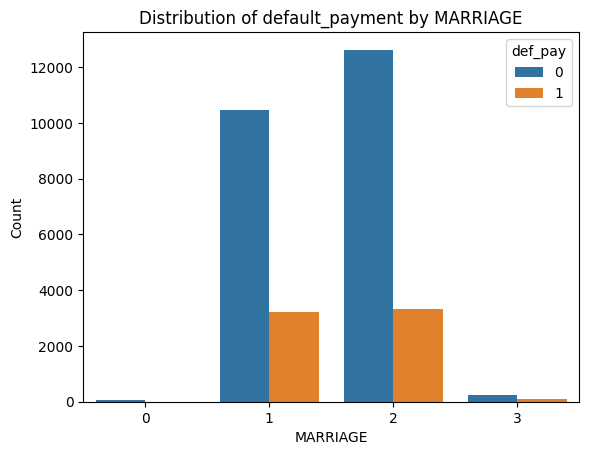

In [15]:
#Marital status (1=married, 2=single, 3=others)
sns.countplot(x='MARRIAGE', hue='def_pay', data=df)
plt.xlabel('MARRIAGE')
plt.ylabel('Count')
plt.title('Distribution of default_payment by MARRIAGE')
plt.show()

In [16]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [17]:
discrete_numerical_variable = [feature for feature in df.columns if len(df[feature].value_counts())<12]
discrete_numerical_variable

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_sep',
 'PAY_aug',
 'PAY_july',
 'PAY_june',
 'PAY_may',
 'PAY_april',
 'def_pay']

In [18]:
#SEX: Gender (1=male, 2=female)
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [19]:
#EDUCATION : (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

conclusion</br>
since 4 , 5 , 6 and even 0 is seem to be same we can place them in one same column could be 4

In [20]:
#MARRIAGE : Marital status (1=married, 2=single, 3=others)
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [21]:
discrete_numerical_variable

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_sep',
 'PAY_aug',
 'PAY_july',
 'PAY_june',
 'PAY_may',
 'PAY_april',
 'def_pay']

In [22]:
discrete_numerical_variable.pop()

'def_pay'

bivariate analysis of discrete_numerical_variable with LIMITED_BALANCE

In [23]:
discrete_numerical_variable

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_sep',
 'PAY_aug',
 'PAY_july',
 'PAY_june',
 'PAY_may',
 'PAY_april']

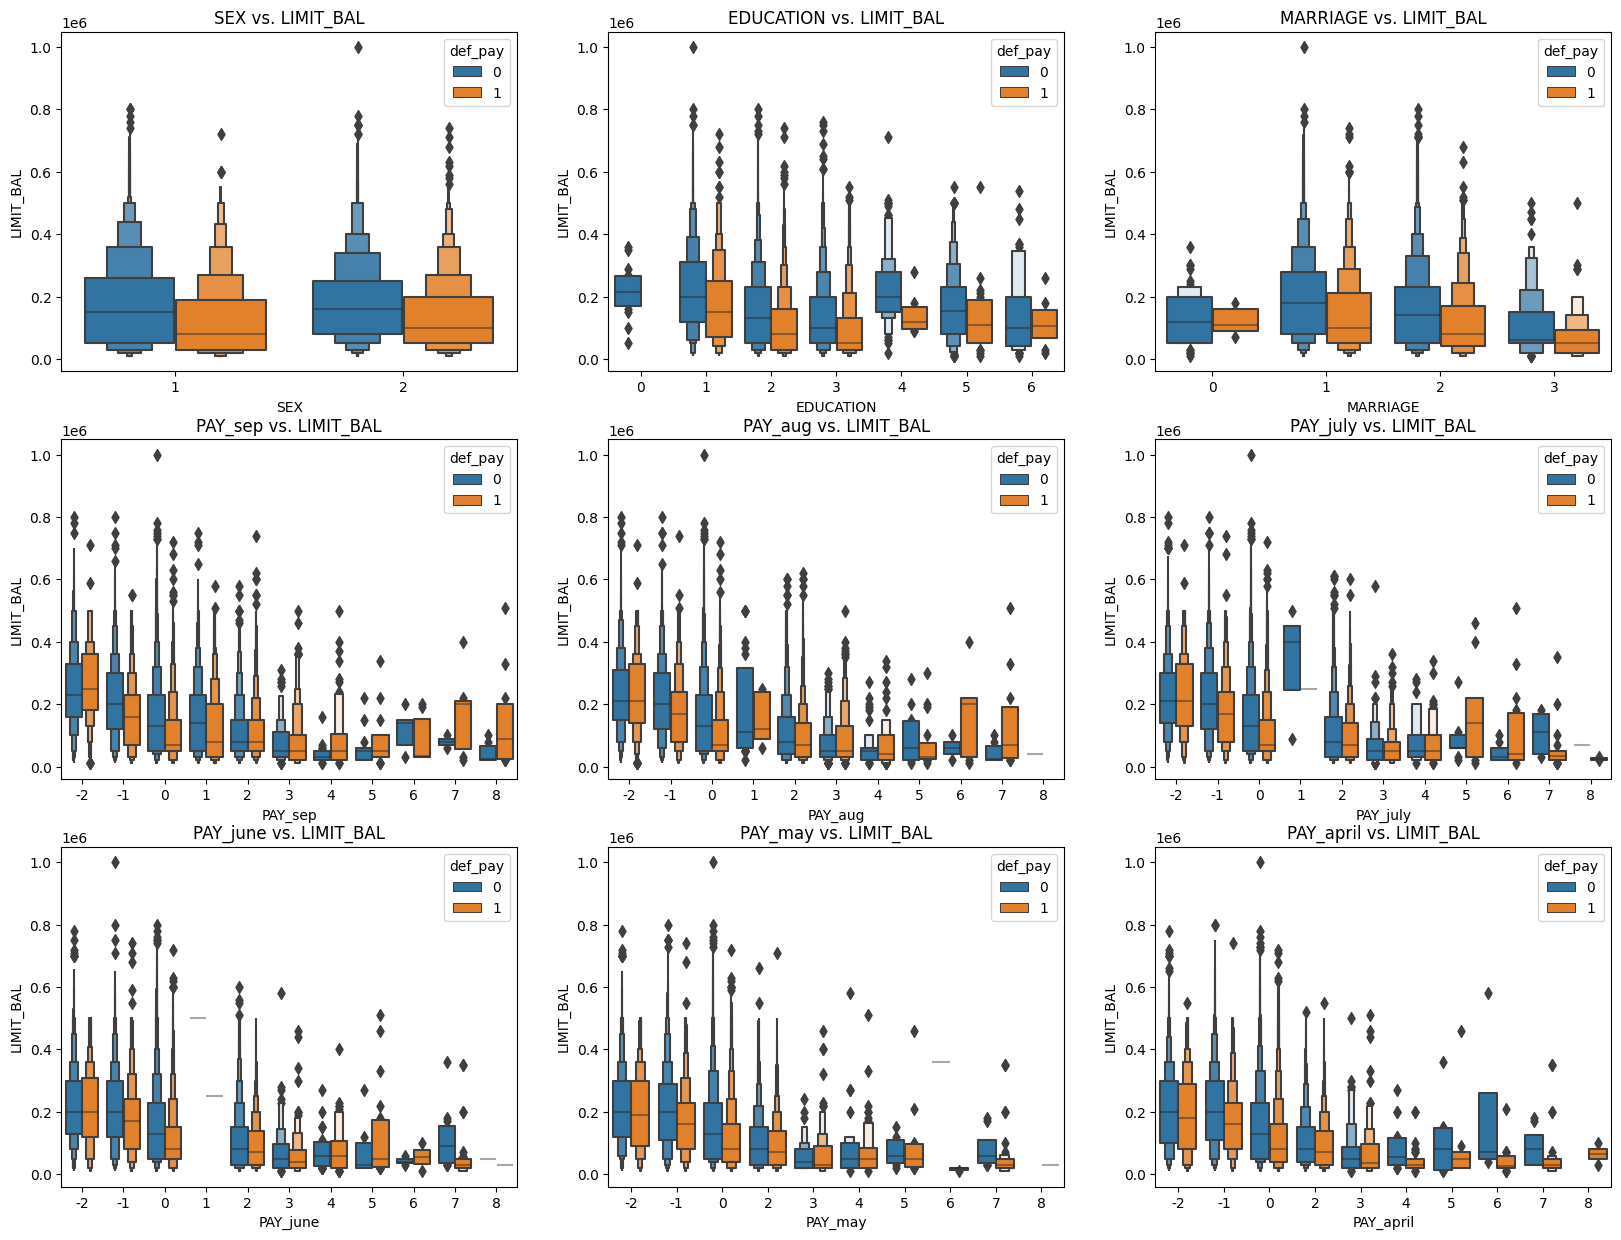

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for i, numerical_col in enumerate(discrete_numerical_variable):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    sns.boxenplot(data=df, y='LIMIT_BAL', x=numerical_col, hue='def_pay', ax=ax)
    ax.set_title(f'{numerical_col} vs. LIMIT_BAL')

plt.show()

In [25]:
df['AGE'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

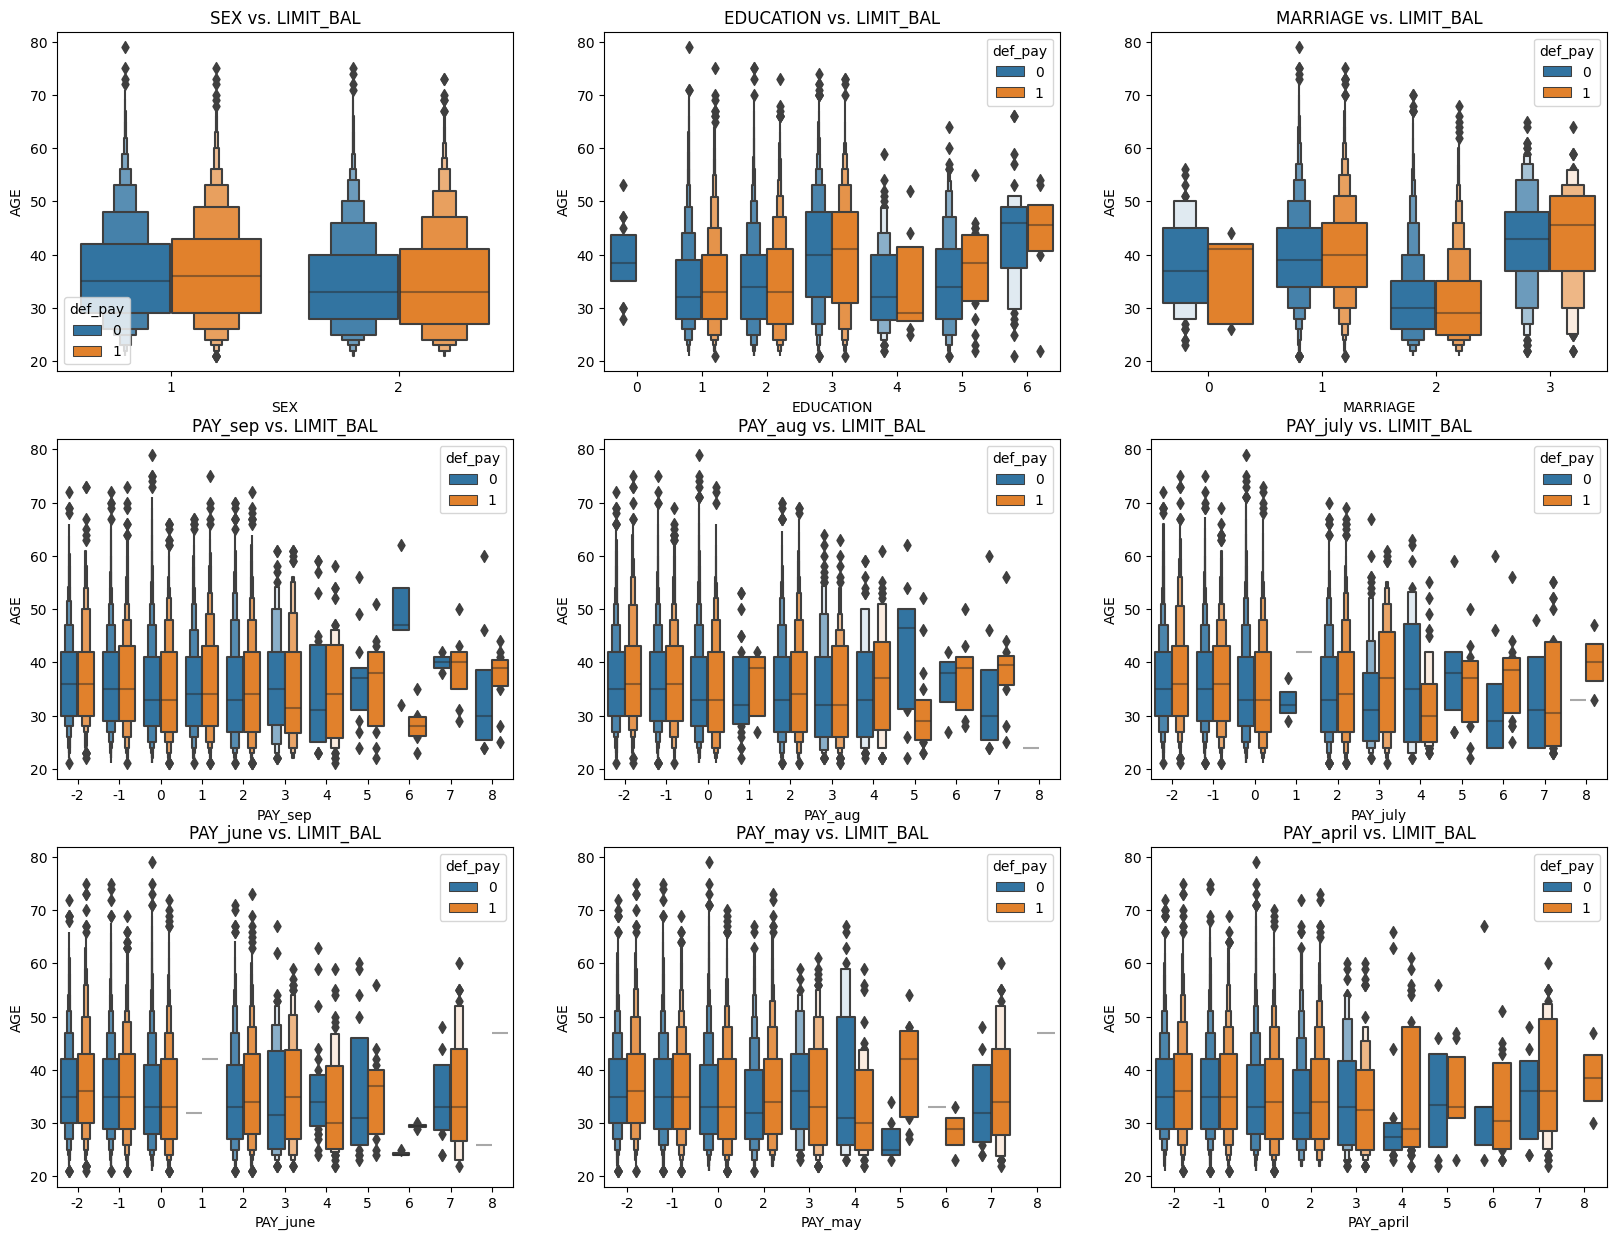

In [26]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for i, numerical_col in enumerate(discrete_numerical_variable):
    row, col = i // 3, i % 3
    ax = axes[row, col]

    sns.boxenplot(data=df, y='AGE', x=numerical_col, hue='def_pay', ax=ax)
    ax.set_title(f'{numerical_col} vs. LIMIT_BAL')

plt.show()

There is presence of outlier in both AGE and LIMIT_BAL columns

In [27]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

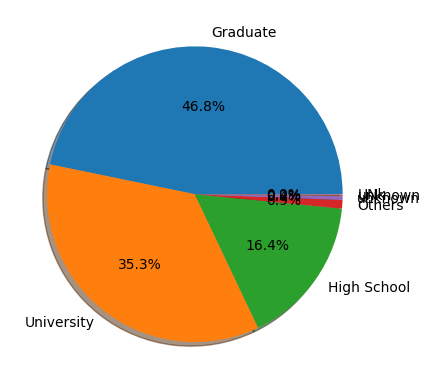

In [28]:
#1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown
df['EDUCATION'].value_counts()
labels = ['Graduate','University','High School','Others','unknown','unknown','UNk']
values = df['EDUCATION'].value_counts().values

fig, ax = plt.subplots()
ax.pie(values, labels = labels, autopct='%1.1f%%', shadow = True)
plt.show()


almost 50% are graduate student

In [29]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [30]:
# Put 0 , 5, 6 into category 4(others)
df['EDUCATION'].replace({0:4,5:4,6:4}, inplace=True)

In [31]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [32]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_sep',
       'PAY_aug', 'PAY_july', 'PAY_june', 'PAY_may', 'PAY_april', 'BILL_sep',
       'BILL_aug', 'BILL_july', 'BILL_june', 'BILL_may', 'BILL_april',
       'PREV_PAY_sep', 'PREV_PAY_aug', 'PREV_PAY_july', 'PREV_PAY_june',
       'PREV_PAY_may', 'PREV_PAY_april', 'def_pay'],
      dtype='object')

In [33]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [34]:
#ARRIAGE : Marital status (1=married, 2=single, 3=others)
df['MARRIAGE'].replace({0:3},inplace = True)

In [35]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [36]:
# copying the original data
df_copy = df.copy()

In [37]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_sep',
       'PAY_aug', 'PAY_july', 'PAY_june', 'PAY_may', 'PAY_april', 'BILL_sep',
       'BILL_aug', 'BILL_july', 'BILL_june', 'BILL_may', 'BILL_april',
       'PREV_PAY_sep', 'PREV_PAY_aug', 'PREV_PAY_july', 'PREV_PAY_june',
       'PREV_PAY_may', 'PREV_PAY_april', 'def_pay'],
      dtype='object')

<Axes: xlabel='BILL_sep', ylabel='LIMIT_BAL'>

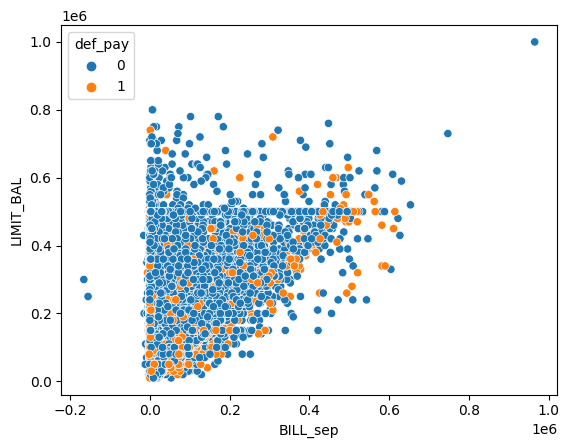

In [38]:
sns.scatterplot(
    data = df_copy, x='BILL_sep',y = 'LIMIT_BAL', hue= 'def_pay',
)

<Axes: xlabel='BILL_aug', ylabel='LIMIT_BAL'>

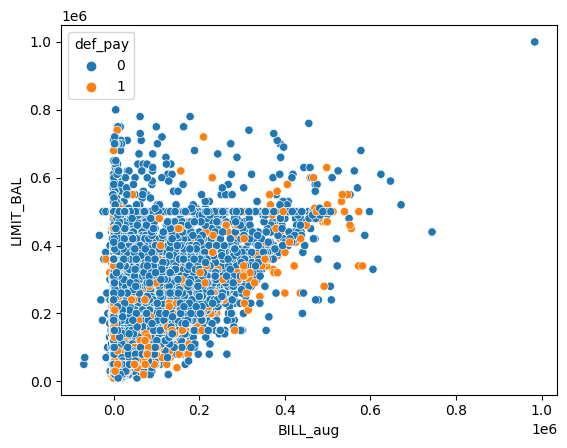

In [39]:
sns.scatterplot(
    data = df_copy, x='BILL_aug',y = 'LIMIT_BAL', hue= 'def_pay',
)

<Axes: xlabel='BILL_july', ylabel='LIMIT_BAL'>

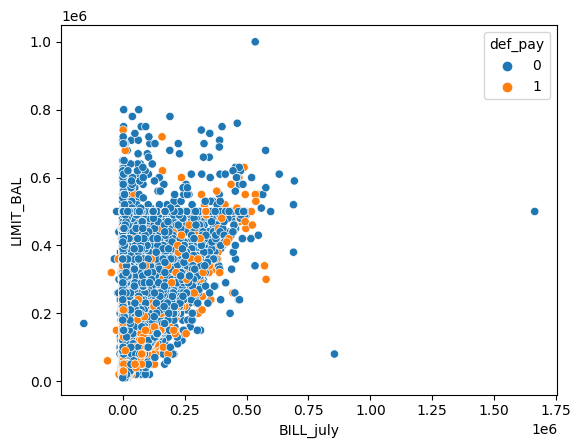

In [40]:
sns.scatterplot(
    data = df_copy, x='BILL_july',y = 'LIMIT_BAL', hue= 'def_pay',
)

we can see the data is imbalanced and there is possibility of being undefaulted also there is presence of outliers.

In [41]:
#handling imbalanced dataset
from imblearn.over_sampling import SMOTE

In [42]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [43]:
oversample = SMOTE()
X_input , y_output = df_copy.iloc[:,:-1],df_copy[['def_pay']]
X,y = oversample.fit_resample(X_input,y_output)
print('Shape of X {}'.format(X.shape))
print('Shape of y {}'.format(y.shape))
df_copy = pd.concat([X,y],axis=1)
print('Normal distributed dataset shape {}'.format(df_copy.shape))

Shape of X (46728, 24)
Shape of y (46728, 1)
Normal distributed dataset shape (46728, 25)


In [44]:
print('After Handling Unbalanced dataset-')
df_copy['def_pay'].value_counts()

After Handling Unbalanced dataset-


1    23364
0    23364
Name: def_pay, dtype: int64

comparison between def_pay

Text(0.5, 1.0, 'BALANCED DATASET')

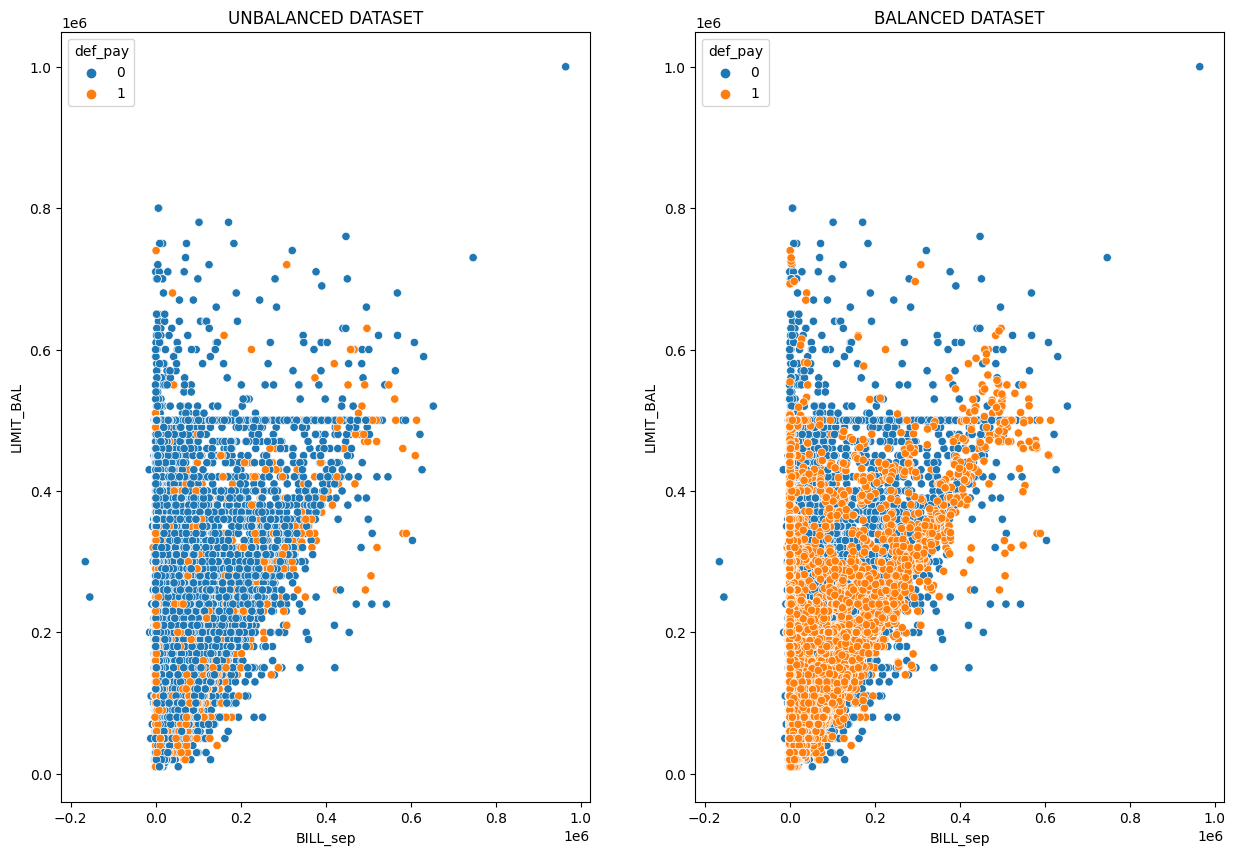

In [45]:
fig, ax = plt.subplots(1,2,figsize=(15,10))
sns.scatterplot(
    data = df, x='BILL_sep',y = 'LIMIT_BAL', hue= 'def_pay',ax=ax[0],
)
ax[0].set_title('UNBALANCED DATASET')
sns.scatterplot(
    data = df_copy, x = 'BILL_sep',y = 'LIMIT_BAL' , hue = 'def_pay',ax=ax[1]
)
ax[1].set_title('BALANCED DATASET')

Feature reduction (test using unbalanced dataset)

In [46]:
df_new = df.copy()
df_new['Dues'] = df_new['BILL_sep'] + df_new['BILL_aug'] + df_new['BILL_july']+ df_new['BILL_june'] + df_new['BILL_may'] + df_new['BILL_april']
df_new['Previous_payments'] = df_new['PREV_PAY_sep'] + df_new['PREV_PAY_aug']+df_new['PREV_PAY_july'] + df_new['PREV_PAY_june']+df_new['PREV_PAY_may'] + df_new['PREV_PAY_april']

In [47]:
df_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_sep,PAY_aug,PAY_july,PAY_june,PAY_may,PAY_april,BILL_sep,BILL_aug,BILL_july,BILL_june,BILL_may,BILL_april,PREV_PAY_sep,PREV_PAY_aug,PREV_PAY_july,PREV_PAY_june,PREV_PAY_may,PREV_PAY_april,def_pay,Dues,Previous_payments
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0,689.0
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0,5000.0
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0,11018.0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0,8388.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0,59049.0


In [48]:
#df_new.head()

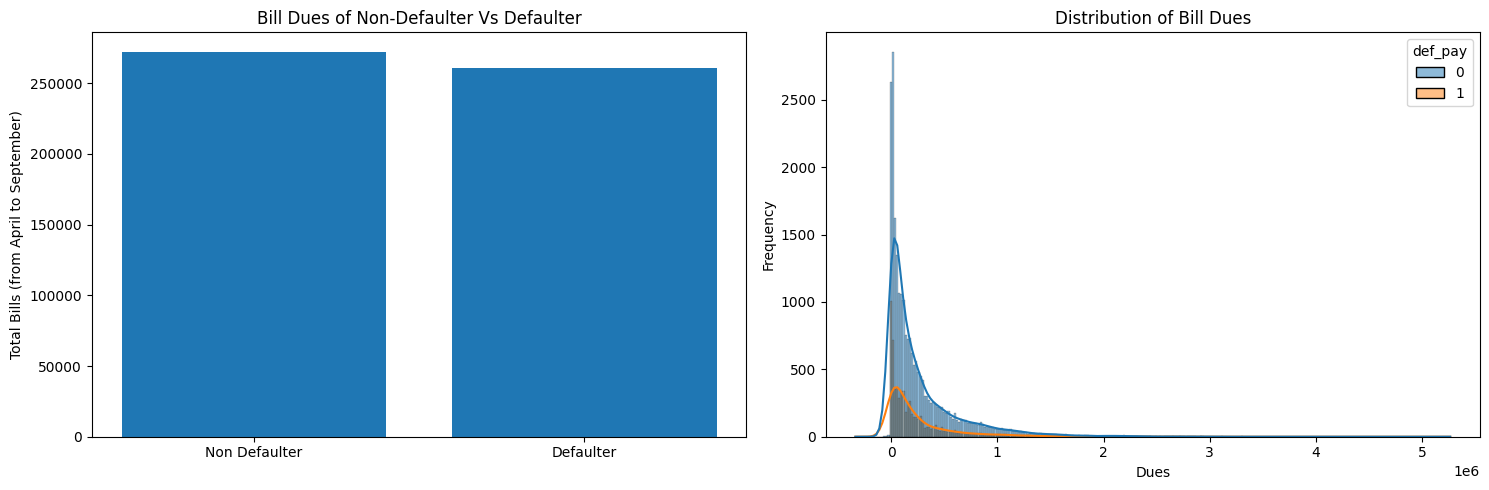

In [49]:
df_new_grouped = df_new.groupby('def_pay')['Dues'].mean()
label = ['Non Defaulter', 'Defaulter']
values = df_new_grouped.values

fig, ax = plt.subplots(1, 2, figsize=(15, 5))  # Create a 1x2 grid of subplots

# Subplot 1: Bar plot
ax[0].bar(label, values)
ax[0].set_title('Bill Dues of Non-Defaulter Vs Defaulter')
ax[0].set_ylabel('Total Bills (from April to September)')

# Subplot 2: Histogram
sns.histplot(data=df_new, x='Dues', hue='def_pay', kde=True, ax=ax[1])
ax[1].set_title('Distribution of Bill Dues')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Bill amount for both category is almost same.</br>
Both group shows similarity in terms of total purchases</br>
Negative values are present in Dues feature </br>

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

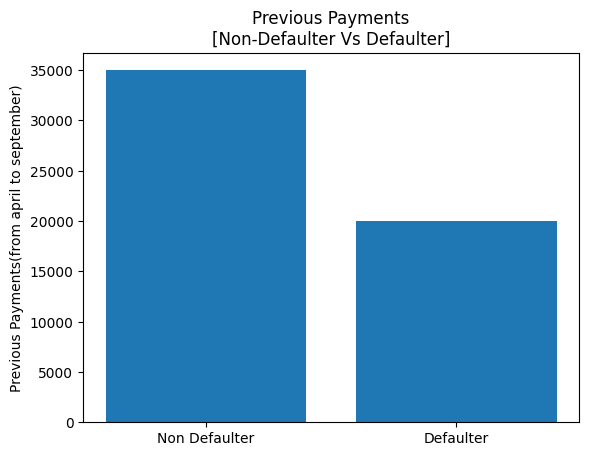

In [50]:
df_new.groupby('def_pay')['Previous_payments'].mean()
label = ['Non Defaulter','Defaulter']
values = df_new.groupby('def_pay')['Previous_payments'].mean().values
plt.bar(label, values)
plt.title('Previous Payments\n[Non-Defaulter Vs Defaulter]')
plt.ylabel('Previous Payments(from april to september)')
plt.tight_layout

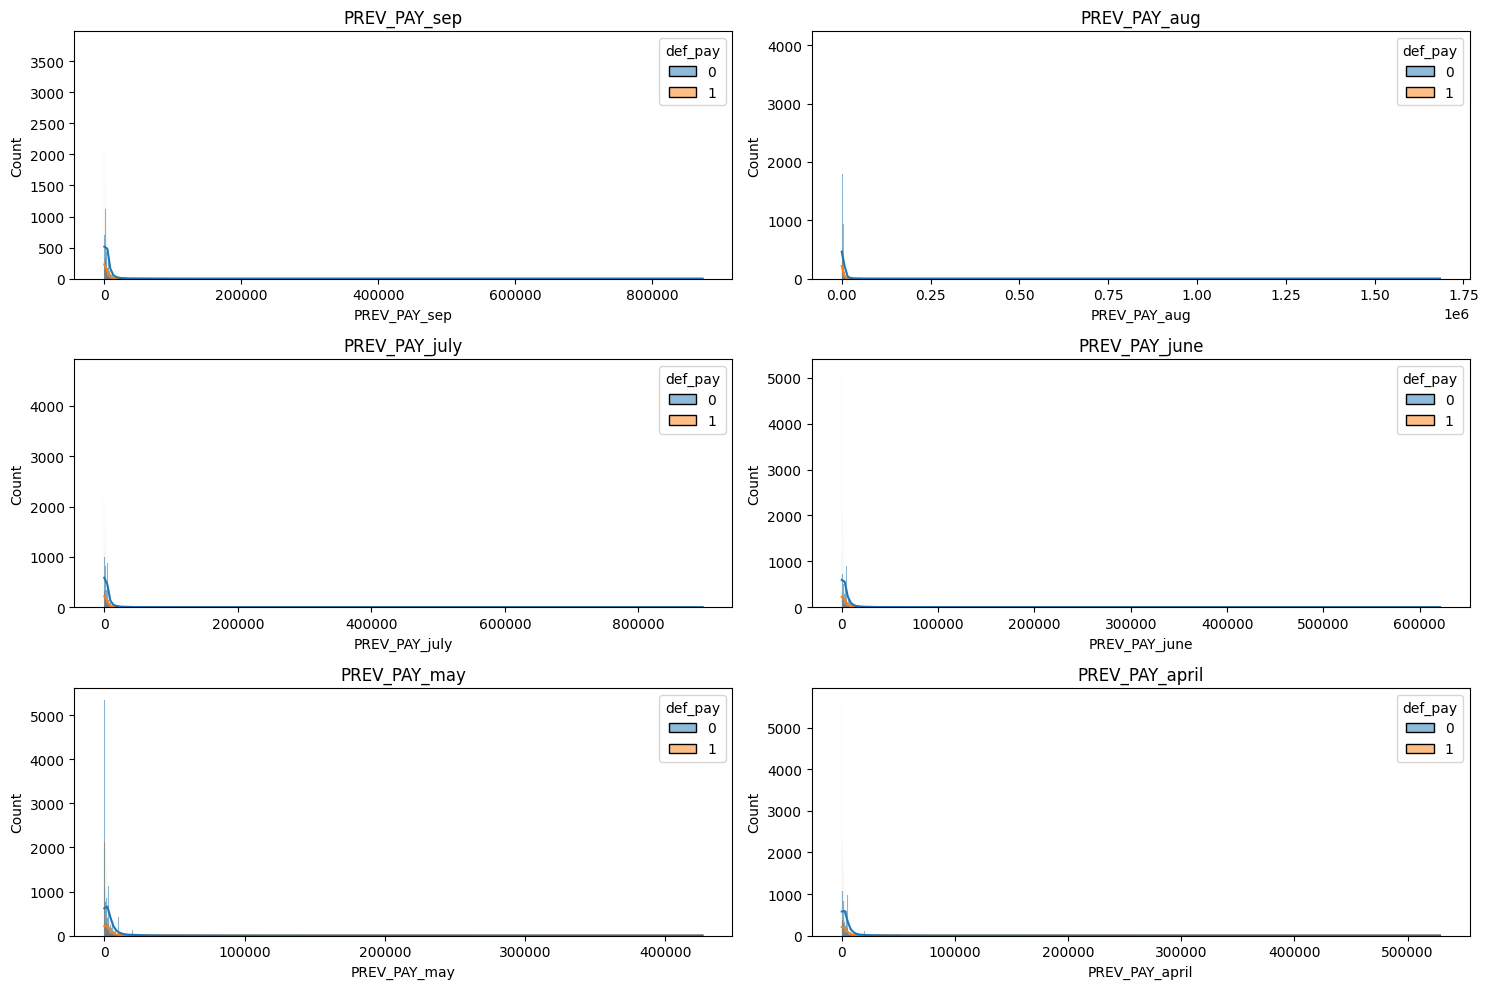

In [51]:
# Previous payments
previous_payment_months=df_new.columns[df_new.columns.str.startswith('PREV_PAY')]
fig, ax = plt.subplots(3,2,figsize=(15,10))
for axes,column in zip(ax.ravel(),previous_payment_months): 
    sns.histplot(
        data = df_new,x=column , kde=True, hue='def_pay', ax=axes
    )
    
    axes.set_title(f'{column}')
    
plt.tight_layout()

In [52]:
df_copy['Dues'] = df_copy['BILL_sep'] + df_copy['BILL_aug'] + df_copy['BILL_july']+ df_copy['BILL_june'] + df_copy['BILL_may'] + df_copy['BILL_april']
df_copy['Previous_payments'] = df_copy['PREV_PAY_sep'] + df_copy['PREV_PAY_aug']+df_copy['PREV_PAY_july'] + df_copy['PREV_PAY_june']+df_copy['PREV_PAY_may'] + df_copy['PREV_PAY_april']

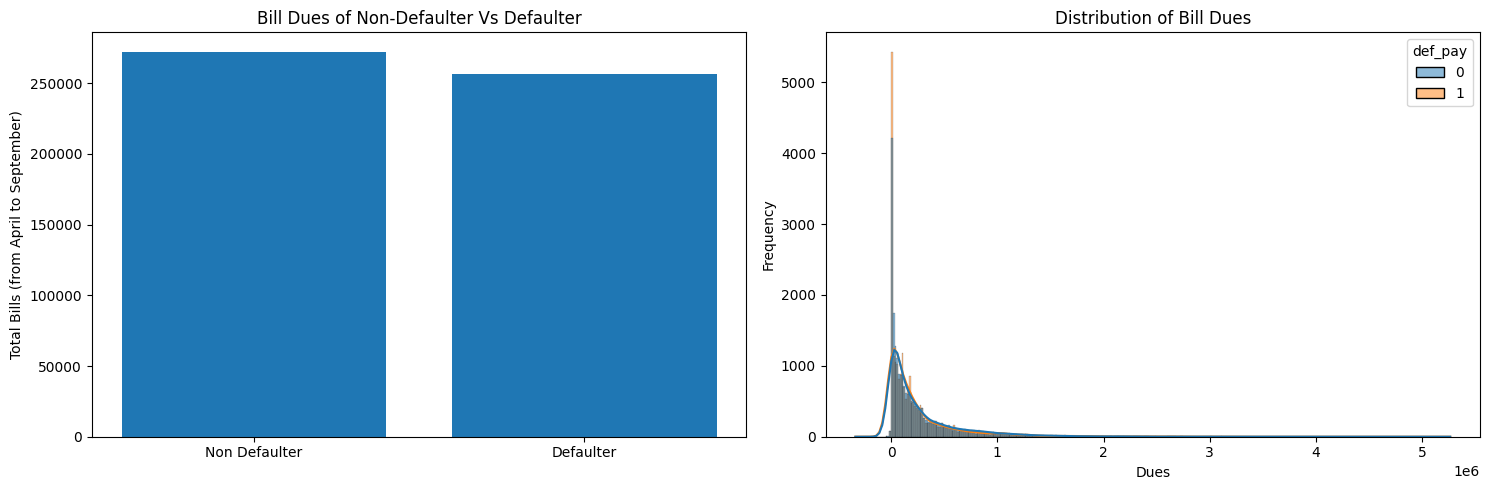

In [53]:
df_copy_grouped = df_copy.groupby('def_pay')['Dues'].mean()
label = ['Non Defaulter', 'Defaulter']
values = df_copy_grouped.values

fig, ax = plt.subplots(1, 2, figsize=(15, 5))  # Create a 1x2 grid of subplots

# Subplot 1: Bar plot
ax[0].bar(label, values)
ax[0].set_title('Bill Dues of Non-Defaulter Vs Defaulter')
ax[0].set_ylabel('Total Bills (from April to September)')

# Subplot 2: Histogram
sns.histplot(data=df_copy, x='Dues', hue='def_pay', kde=True, ax=ax[1])
ax[1].set_title('Distribution of Bill Dues')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

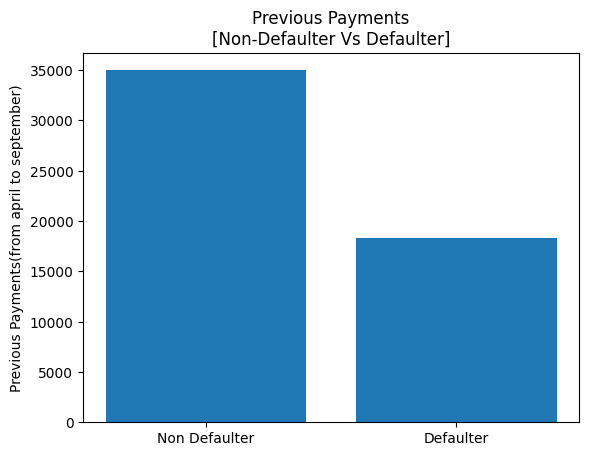

In [54]:
df_copy.groupby('def_pay')['Previous_payments'].mean()
label = ['Non Defaulter','Defaulter']
values = df_copy.groupby('def_pay')['Previous_payments'].mean().values
plt.bar(label, values)
plt.title('Previous Payments\n[Non-Defaulter Vs Defaulter]')
plt.ylabel('Previous Payments(from april to september)')
plt.tight_layout

Feature Scaling

In [55]:
log_transformed_columns = []

# Create a DataFrame to store the log-transformed values
log_transformed_previous_month_payment_df = pd.DataFrame()

for column in previous_payment_months:
    log_column_name = 'log_' + column
    log_transformed_columns.append(log_column_name)

    # Calculate the log-transformed values and add them to the DataFrame
    log_transformed_previous_month_payment_df[log_column_name] = df_new[column].apply(lambda x: np.log(x) if x > 0 else 0)


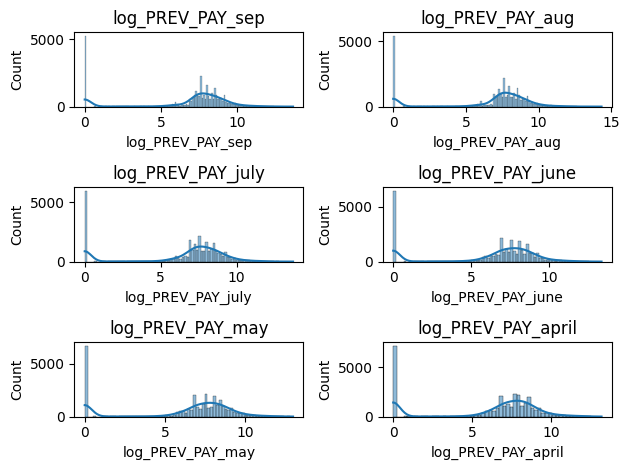

In [56]:
fig, ax = plt.subplots(3,2)
for axes,column in zip(ax.ravel(),log_transformed_columns):
    sns.histplot(
        data = log_transformed_previous_month_payment_df,x=column , kde=True, ax=axes
    )

    axes.set_title(f'{column}')

plt.tight_layout()

In [57]:
# Create a DataFrame to store the log-transformed values
from sklearn.preprocessing import  PowerTransformer, Normalizer
l1_norm_transformed_previous_month_payment_df = pd.DataFrame(index=df.index)
normalize= Normalizer(norm='l1')
for column in previous_payment_months:
    l1_norm_column_name = 'l1_norm_' + column
    normalize.fit(df[[column]])
    normalized_data = normalize.fit_transform(df[[column]])
    l1_norm_transformed_previous_month_payment_df[l1_norm_column_name] = normalized_data

In [58]:
yt = PowerTransformer()
scaled_balanced_df = pd.DataFrame(index =df_new.index)
# for all columns except 'will_default','Previous_payments',Dues'
for col in df_new.columns[:-3]:
    scaled_balanced_df[col] = df_new[col]
scaled_balanced_df['def_pay'] = df_new[['def_pay']]
scaled_balanced_df['Previous_payments'] = yt.fit_transform(df_new[['Previous_payments']])
scaled_balanced_df['Dues'] = yt.fit_transform(df_new[['Dues']])

In [59]:
yt = PowerTransformer()
norm_l1 = Normalizer(norm='l1')
scaled_unbalanced_df = pd.DataFrame(index =df_new.index)
# for all columns except 'will_default','Previous_payments',Dues'
for col in df_new.columns[:-3]:
    scaled_unbalanced_df[col] = df_new[col]
scaled_unbalanced_df['def_pay'] = df_new[['def_pay']]
scaled_unbalanced_df['Previous_payments'] = yt.fit_transform(df_new[['Previous_payments']])
scaled_unbalanced_df['Dues'] = yt.fit_transform(df_new[['Dues']])

In [60]:
yt = PowerTransformer()
scaled_balanced_df = pd.DataFrame(index =df_new.index)
# for all columns except 'will_default','Previous_payments',Dues'
for col in df_new.columns[:-3]:
    scaled_balanced_df[col] = df_new[col]
scaled_balanced_df['def_pay'] = df_new[['def_pay']]
scaled_balanced_df['Previous_payments'] = yt.fit_transform(df_new[['Previous_payments']])
scaled_balanced_df['Dues'] = yt.fit_transform(df_new[['Dues']])

In [61]:
df_new = pd.get_dummies(df_new, columns=['SEX','EDUCATION','MARRIAGE'],dtype=int)
df_copy = pd.get_dummies(df_copy, columns=['SEX','EDUCATION','MARRIAGE'], dtype=int)
# Scaled dataframes
scaled_unbalanced_df = pd.get_dummies(scaled_unbalanced_df, columns=['SEX','EDUCATION','MARRIAGE'], dtype=int)
scaled_balanced_df = pd.get_dummies(scaled_balanced_df, columns=['SEX','EDUCATION','MARRIAGE'], dtype=int)

In [62]:
scaled_unbalanced_df

,ID,LIMIT_BAL,AGE,PAY_sep,PAY_aug,PAY_july,PAY_june,PAY_may,PAY_april,BILL_sep,BILL_aug,BILL_july,BILL_june,BILL_may,BILL_april,PREV_PAY_sep,PREV_PAY_aug,PREV_PAY_july,PREV_PAY_june,PREV_PAY_may,PREV_PAY_april,def_pay,Previous_payments,Dues,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,-1.460087,-0.748025,0,1,0,1,0,0,1,0,0
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,-0.673793,-0.706824,0,1,0,1,0,0,0,1,0
2,3,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,-0.237402,-0.408515,0,1,0,1,0,0,0,1,0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,-0.397654,-0.021463,0,1,0,1,0,0,1,0,0
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1.023381,-0.384071,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0.735055,1.243101,1,0,0,0,1,0,1,0,0
29996,29997,150000.0,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,-0.065322,-0.689978,1,0,0,0,1,0,0,1,0
29997,29998,30000.0,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,0.485053,-0.510752,1,0,0,1,0,0,0,1,0
29998,29999,80000.0,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,1.960265,0.077257,1,0,0,0,1,0,1,0,0


In [63]:
scaled_balanced_df

,ID,LIMIT_BAL,AGE,PAY_sep,PAY_aug,PAY_july,PAY_june,PAY_may,PAY_april,BILL_sep,BILL_aug,BILL_july,BILL_june,BILL_may,BILL_april,PREV_PAY_sep,PREV_PAY_aug,PREV_PAY_july,PREV_PAY_june,PREV_PAY_may,PREV_PAY_april,def_pay,Previous_payments,Dues,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,-1.460087,-0.748025,0,1,0,1,0,0,1,0,0
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,-0.673793,-0.706824,0,1,0,1,0,0,0,1,0
2,3,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,-0.237402,-0.408515,0,1,0,1,0,0,0,1,0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,-0.397654,-0.021463,0,1,0,1,0,0,1,0,0
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1.023381,-0.384071,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0.735055,1.243101,1,0,0,0,1,0,1,0,0
29996,29997,150000.0,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,-0.065322,-0.689978,1,0,0,0,1,0,0,1,0
29997,29998,30000.0,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,0.485053,-0.510752,1,0,0,1,0,0,0,1,0
29998,29999,80000.0,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,1.960265,0.077257,1,0,0,0,1,0,1,0,0


In [64]:
df_new.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'PAY_sep', 'PAY_aug', 'PAY_july', 'PAY_june',
       'PAY_may', 'PAY_april', 'BILL_sep', 'BILL_aug', 'BILL_july',
       'BILL_june', 'BILL_may', 'BILL_april', 'PREV_PAY_sep', 'PREV_PAY_aug',
       'PREV_PAY_july', 'PREV_PAY_june', 'PREV_PAY_may', 'PREV_PAY_april',
       'def_pay', 'Dues', 'Previous_payments', 'SEX_1', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3'],
      dtype='object')

In [65]:
print('Total columns non_scaled_unbalanced {}'.format(len(df_new.columns)))
print('Total columns non_scaled_balanced {}'.format(len(df_copy.columns)))
print('Total columns scaled_balanced_df {}'.format(len(scaled_balanced_df.columns)))
print('Total columns scaled_unbalanced_df {}'.format(len(scaled_unbalanced_df.columns)))

Total columns non_scaled_unbalanced 33
Total columns non_scaled_balanced 33
Total columns scaled_balanced_df 33
Total columns scaled_unbalanced_df 33


In [66]:
df_new.drop(['ID','BILL_sep','BILL_aug','BILL_july','BILL_june','BILL_may','BILL_april','PREV_PAY_sep','PREV_PAY_aug','PREV_PAY_july','PREV_PAY_june','PREV_PAY_sep','PREV_PAY_may','PREV_PAY_april'],axis=1, inplace=True)

df_copy.drop(['ID','BILL_sep','BILL_aug','BILL_july','BILL_june','BILL_may','BILL_april','PREV_PAY_sep','PREV_PAY_aug','PREV_PAY_july','PREV_PAY_june','PREV_PAY_sep','PREV_PAY_may','PREV_PAY_april'],axis=1, inplace=True)

scaled_balanced_df.drop(['ID','BILL_sep','BILL_aug','BILL_july','BILL_june','BILL_may','BILL_april','PREV_PAY_sep','PREV_PAY_aug','PREV_PAY_july','PREV_PAY_june','PREV_PAY_sep','PREV_PAY_may','PREV_PAY_april'],axis=1, inplace=True)

scaled_unbalanced_df.drop(['ID','BILL_sep','BILL_aug','BILL_july','BILL_june','BILL_may','BILL_april','PREV_PAY_sep','PREV_PAY_aug','PREV_PAY_july','PREV_PAY_june','PREV_PAY_sep','PREV_PAY_may','PREV_PAY_april'],axis=1, inplace=True)


In [67]:
print('Total columns non_scaled_unbalanced {}'.format(len(df_new.columns)))
print('Total columns non_scaled_balanced {}'.format(len(df_copy.columns)))
print('Total columns scaled_balanced_df {}'.format(len(scaled_balanced_df.columns)))
print('Total columns scaled_unbalanced_df {}'.format(len(scaled_unbalanced_df.columns)))

Total columns non_scaled_unbalanced 20
Total columns non_scaled_balanced 20
Total columns scaled_balanced_df 20
Total columns scaled_unbalanced_df 20


In [68]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [69]:
from sklearn.calibration import  calibration_curve,CalibrationDisplay
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,classification_report,confusion_matrix,roc_curve
from sklearn.preprocessing import  PowerTransformer, Normalizer

In [70]:
# algorithms group
svc = SVC()
dtc = DecisionTreeClassifier()
rfclf = RandomForestClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()
xgb = XGBClassifier()
ada_boost = AdaBoostClassifier()

classifiers  = {
    #obj : algo
    'SupportVectorMachine' : svc,
    'DecisionTreeClassifier' : dtc,
    'AdaboostClassifier': ada_boost,
    'RandomForestClassifier' : rfclf,
    'KNeighborsClassifier' : knn,
    'LogisticRegression' :lr,
    'XGBClassifier' : xgb
}

In [71]:
def best_model_selection(data,AUC=False, calibration_curve=False):
    algorithms = []
    mse_test =[]   
    accuracy_on_test=[]
    accuracy_on_train = []

    
    X_train,X_test, y_train,y_test = train_test_split(data.drop(['def_pay'],axis=1), data[['def_pay']])
    for obj, model in classifiers.items():
        algorithms.append(obj)
        model.fit(X_train,y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        accuracy_on_train.append(accuracy_score(y_train,train_pred))
        accuracy_on_test.append(accuracy_score(y_test, test_pred))

        mse_test.append(mean_squared_error(y_test,test_pred))
    score_data = {
        'Algorithm' : algorithms,
        'Accuracy(Train)' : accuracy_on_train,
        'Accurcy(Test)' : accuracy_on_test,
        'Test accuracy(MSE)' : mse_test,
    }
    score_df = pd.DataFrame(score_data)
 
        
    return score_df

In [72]:
score_df_copy = best_model_selection(df_copy)
score_df_copy

/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d a

,Algorithm,Accuracy(Train),Accurcy(Test),Test accuracy(MSE)
0,SupportVectorMachine,0.619186,0.616590,0.383410
1,DecisionTreeClassifier,0.999401,0.743109,0.256891
2,AdaboostClassifier,0.754323,0.744650,0.255350
3,RandomForestClassifier,0.999401,0.809279,0.190721
4,KNeighborsClassifier,0.771272,0.654597,0.345403
5,LogisticRegression,0.612709,0.616247,0.383753
6,XGBClassifier,0.857787,0.802859,0.197141


In [73]:
score_unbalanced_df = best_model_selection(scaled_unbalanced_df)
score_unbalanced_df

/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d a

,Algorithm,Accuracy(Train),Accurcy(Test),Test accuracy(MSE)
0,SupportVectorMachine,0.779822,0.775733,0.224267
1,DecisionTreeClassifier,0.999644,0.735067,0.264933
2,AdaboostClassifier,0.818533,0.818133,0.181867
3,RandomForestClassifier,0.999644,0.810800,0.189200
4,KNeighborsClassifier,0.839333,0.789200,0.210800
5,LogisticRegression,0.779822,0.775733,0.224267
6,XGBClassifier,0.872667,0.810400,0.189600


In [74]:
score_balanced_df = best_model_selection(scaled_balanced_df)
score_balanced_df

/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d a

,Algorithm,Accuracy(Train),Accurcy(Test),Test accuracy(MSE)
0,SupportVectorMachine,0.776889,0.784533,0.215467
1,DecisionTreeClassifier,0.999289,0.723600,0.276400
2,AdaboostClassifier,0.820933,0.818667,0.181333
3,RandomForestClassifier,0.999200,0.814133,0.185867
4,KNeighborsClassifier,0.837778,0.791867,0.208133
5,LogisticRegression,0.776889,0.784533,0.215467
6,XGBClassifier,0.868089,0.817467,0.182533


In [75]:
score_df_simple = best_model_selection(df_new)
score_df_simple

/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d a

,Algorithm,Accuracy(Train),Accurcy(Test),Test accuracy(MSE)
0,SupportVectorMachine,0.777511,0.782667,0.217333
1,DecisionTreeClassifier,0.999467,0.722267,0.277733
2,AdaboostClassifier,0.818533,0.819200,0.180800
3,RandomForestClassifier,0.999467,0.815200,0.184800
4,KNeighborsClassifier,0.811556,0.746667,0.253333
5,LogisticRegression,0.777511,0.782667,0.217333
6,XGBClassifier,0.866089,0.817067,0.182933


In [83]:
X_train,X_test,y_train,y_test = train_test_split(df_new.drop(['def_pay'],axis=1),df_new[['def_pay']],random_state=42)
adb = AdaBoostClassifier()
params = {
    'n_estimators' : [30,50,70,100],
    'algorithm' : ['SAMME','SAMME.R'],
    'learning_rate' :[0.5,0.7,1,1.4]
}
clf = GridSearchCV(estimator=adb,param_grid=params,cv=5,scoring='accuracy', verbose=3)
clf.fit(X_train,y_train)
best_parameters = clf.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=30;, score=0.822 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=30;, score=0.824 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=30;, score=0.822 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=30;, score=0.819 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=30;, score=0.814 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=50;, score=0.821 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=50;, score=0.826 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=50;, score=0.821 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=50;, score=0.820 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=50;, score=0.814 total time=   0.4s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=70;, score=0.822 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=70;, score=0.824 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=70;, score=0.823 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=70;, score=0.819 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=70;, score=0.814 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=100;, score=0.822 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=100;, score=0.825 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=100;, score=0.823 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=100;, score=0.819 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=100;, score=0.814 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=30;, score=0.819 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=30;, score=0.822 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=30;, score=0.816 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=30;, score=0.814 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=30;, score=0.812 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=50;, score=0.818 total time=   0.4s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=50;, score=0.822 total time=   0.4s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=50;, score=0.815 total time=   0.4s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=50;, score=0.814 total time=   0.4s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=50;, score=0.814 total time=   0.4s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=70;, score=0.818 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=70;, score=0.822 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=70;, score=0.815 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=70;, score=0.815 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=70;, score=0.814 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=100;, score=0.818 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=100;, score=0.822 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=100;, score=0.815 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=100;, score=0.814 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=100;, score=0.814 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=1, n_estimators=30;, score=0.816 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=1, n_estimators=30;, score=0.823 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=1, n_estimators=30;, score=0.818 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=1, n_estimators=30;, score=0.816 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=1, n_estimators=30;, score=0.812 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=1, n_estimators=50;, score=0.817 total time=   0.4s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=1, n_estimators=50;, score=0.825 total time=   0.4s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=1, n_estimators=50;, score=0.818 total time=   0.4s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=1, n_estimators=50;, score=0.817 total time=   0.4s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=1, n_estimators=50;, score=0.812 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=1, n_estimators=70;, score=0.819 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=1, n_estimators=70;, score=0.824 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=1, n_estimators=70;, score=0.818 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=1, n_estimators=70;, score=0.820 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=1, n_estimators=70;, score=0.814 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=1, n_estimators=100;, score=0.818 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=1, n_estimators=100;, score=0.824 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=1, n_estimators=100;, score=0.819 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=1, n_estimators=100;, score=0.820 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=1, n_estimators=100;, score=0.814 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=30;, score=0.817 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=30;, score=0.825 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=30;, score=0.815 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=30;, score=0.814 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=30;, score=0.816 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=50;, score=0.819 total time=   0.4s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=50;, score=0.824 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=50;, score=0.816 total time=   0.4s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=50;, score=0.815 total time=   0.4s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=50;, score=0.816 total time=   0.4s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=70;, score=0.819 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=70;, score=0.824 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=70;, score=0.816 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=70;, score=0.812 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=70;, score=0.815 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=100;, score=0.819 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=100;, score=0.823 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=100;, score=0.817 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=100;, score=0.815 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=100;, score=0.815 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=30;, score=0.817 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=30;, score=0.822 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=30;, score=0.816 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=30;, score=0.815 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=30;, score=0.815 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=50;, score=0.818 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=50;, score=0.822 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=50;, score=0.817 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=50;, score=0.816 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=50;, score=0.815 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=70;, score=0.817 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=70;, score=0.822 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=70;, score=0.818 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=70;, score=0.816 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=70;, score=0.816 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100;, score=0.817 total time=   1.0s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100;, score=0.821 total time=   1.0s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100;, score=0.818 total time=   1.0s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100;, score=0.814 total time=   1.0s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100;, score=0.816 total time=   1.0s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=30;, score=0.819 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=30;, score=0.824 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=30;, score=0.816 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=30;, score=0.816 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=30;, score=0.813 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=50;, score=0.818 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=50;, score=0.822 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=50;, score=0.815 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=50;, score=0.817 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=50;, score=0.813 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=70;, score=0.818 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=70;, score=0.823 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=70;, score=0.819 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=70;, score=0.816 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=70;, score=0.814 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=100;, score=0.817 total time=   1.0s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=100;, score=0.821 total time=   1.0s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=100;, score=0.817 total time=   1.0s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=100;, score=0.815 total time=   1.0s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=100;, score=0.815 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=30;, score=0.819 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=30;, score=0.820 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=30;, score=0.816 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=30;, score=0.815 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=30;, score=0.812 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=50;, score=0.819 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=50;, score=0.823 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=50;, score=0.814 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=50;, score=0.813 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=50;, score=0.816 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=70;, score=0.818 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=70;, score=0.823 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=70;, score=0.817 total time=   0.8s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=70;, score=0.814 total time=   0.8s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=70;, score=0.815 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=100;, score=0.817 total time=   1.0s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=100;, score=0.822 total time=   1.0s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=100;, score=0.818 total time=   1.0s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=100;, score=0.814 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=100;, score=0.814 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=30;, score=0.816 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=30;, score=0.818 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=30;, score=0.814 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=30;, score=0.814 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=30;, score=0.815 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=50;, score=0.820 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=50;, score=0.822 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=50;, score=0.818 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=50;, score=0.815 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=50;, score=0.818 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=70;, score=0.817 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=70;, score=0.822 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=70;, score=0.817 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=70;, score=0.813 total time=   0.8s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=70;, score=0.816 total time=   0.8s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=100;, score=0.817 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=100;, score=0.823 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=100;, score=0.817 total time=   1.0s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=100;, score=0.814 total time=   1.0s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=100;, score=0.816 total time=   1.0s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
adb = AdaBoostClassifier(**best_parameters)
adb.fit(X_train,y_train)
y_prediction = adb.predict(X_test)
print('Final accuracy of the model is {}%'.format(accuracy_score(y_test,y_prediction)*100))
print('Classification Report \n{}'.format(classification_report(y_test,y_prediction)))
print('Confusion Matrix \n{}'.format(confusion_matrix(y_test,y_prediction)))
      

/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Final accuracy of the model is 81.96%
Classification Report 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.67      0.34      0.45      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.67      7500
weighted avg       0.80      0.82      0.80      7500

Confusion Matrix 
[[5596  277]
 [1076  551]]


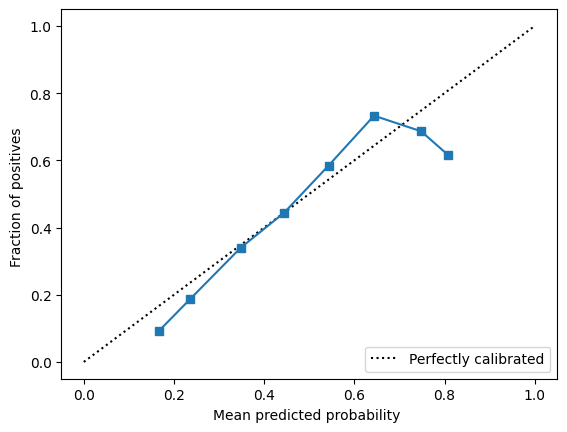

In [79]:
y_prob = adb.predict_proba(X_test)[:,1]
prob_true , prob_pred = calibration_curve(y_test,y_prob,n_bins=10)
display = CalibrationDisplay(prob_true,prob_pred,y_prob)
display.plot()

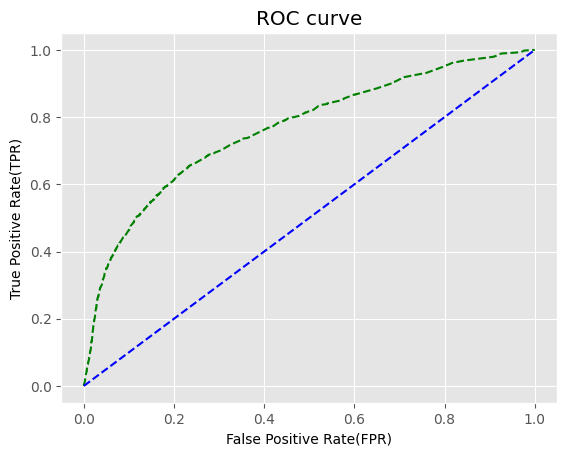

In [80]:
# roc curve
fpr, tpr , thresh = roc_curve(y_test,y_prob,pos_label=1)

#roc curve when tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr,_ = roc_curve(y_test,random_probs,pos_label=1)
plt.style.use('ggplot')

plt.plot(fpr,tpr,linestyle='--', color = 'green',label = 'AdaboostClassifer')
plt.plot(p_fpr,p_tpr, linestyle='--', color = 'blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.show()

In [81]:
X_train,X_test,y_train,y_test = train_test_split(scaled_balanced_df.drop(['def_pay'],axis=1),scaled_balanced_df[['def_pay']],random_state=42)
adb = AdaBoostClassifier()
params = {
    'n_estimators' : [30,50,70,100],
    'algorithm' : ['SAMME','SAMME.R'],
    'learning_rate' :[0.5,0.7,1,1.4]
}
clf = GridSearchCV(estimator=adb,param_grid=params,cv=5,scoring='accuracy', verbose=3)
clf.fit(X_train,y_train)
best_parameters = clf.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=30;, score=0.822 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=30;, score=0.824 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=30;, score=0.822 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=30;, score=0.819 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=30;, score=0.814 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=50;, score=0.821 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=50;, score=0.826 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=50;, score=0.821 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=50;, score=0.820 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=50;, score=0.814 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=70;, score=0.822 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=70;, score=0.824 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=70;, score=0.823 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=70;, score=0.819 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=70;, score=0.814 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=100;, score=0.822 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=100;, score=0.825 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=100;, score=0.823 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=100;, score=0.819 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=0.5, n_estimators=100;, score=0.814 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=30;, score=0.819 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=30;, score=0.822 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=30;, score=0.816 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=30;, score=0.814 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=30;, score=0.812 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=50;, score=0.818 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=50;, score=0.822 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=50;, score=0.815 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=50;, score=0.814 total time=   0.4s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=50;, score=0.814 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=70;, score=0.818 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=70;, score=0.822 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=70;, score=0.815 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=70;, score=0.815 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=70;, score=0.814 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=100;, score=0.818 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=100;, score=0.822 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=100;, score=0.815 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=100;, score=0.814 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=100;, score=0.814 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=1, n_estimators=30;, score=0.816 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=1, n_estimators=30;, score=0.823 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=1, n_estimators=30;, score=0.818 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=1, n_estimators=30;, score=0.816 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=1, n_estimators=30;, score=0.812 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=1, n_estimators=50;, score=0.817 total time=   0.4s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=1, n_estimators=50;, score=0.825 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=1, n_estimators=50;, score=0.818 total time=   0.4s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=1, n_estimators=50;, score=0.817 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=1, n_estimators=50;, score=0.812 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=1, n_estimators=70;, score=0.819 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=1, n_estimators=70;, score=0.824 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=1, n_estimators=70;, score=0.818 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=1, n_estimators=70;, score=0.820 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=1, n_estimators=70;, score=0.814 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=1, n_estimators=100;, score=0.818 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=1, n_estimators=100;, score=0.824 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=1, n_estimators=100;, score=0.819 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=1, n_estimators=100;, score=0.820 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=1, n_estimators=100;, score=0.814 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=30;, score=0.817 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=30;, score=0.825 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=30;, score=0.815 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=30;, score=0.814 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=30;, score=0.816 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=50;, score=0.819 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=50;, score=0.824 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=50;, score=0.816 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=50;, score=0.815 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=50;, score=0.816 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=70;, score=0.819 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=70;, score=0.824 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=70;, score=0.816 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=70;, score=0.812 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=70;, score=0.815 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=100;, score=0.819 total time=   1.0s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=100;, score=0.823 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=100;, score=0.817 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=100;, score=0.815 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME, learning_rate=1.4, n_estimators=100;, score=0.815 total time=   0.9s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=30;, score=0.817 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=30;, score=0.822 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=30;, score=0.816 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=30;, score=0.815 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=30;, score=0.815 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=50;, score=0.818 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=50;, score=0.822 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=50;, score=0.817 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=50;, score=0.816 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=50;, score=0.815 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=70;, score=0.817 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=70;, score=0.822 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=70;, score=0.818 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=70;, score=0.816 total time=   0.8s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=70;, score=0.816 total time=   0.8s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100;, score=0.817 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100;, score=0.821 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100;, score=0.818 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100;, score=0.814 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.5, n_estimators=100;, score=0.816 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=30;, score=0.819 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=30;, score=0.824 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=30;, score=0.816 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=30;, score=0.816 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=30;, score=0.813 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=50;, score=0.818 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=50;, score=0.822 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=50;, score=0.815 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=50;, score=0.817 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=50;, score=0.813 total time=   0.6s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=70;, score=0.818 total time=   0.8s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=70;, score=0.823 total time=   0.8s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=70;, score=0.819 total time=   0.8s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=70;, score=0.816 total time=   0.8s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=70;, score=0.814 total time=   0.8s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=100;, score=0.817 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=100;, score=0.821 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=100;, score=0.817 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=100;, score=0.815 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=0.7, n_estimators=100;, score=0.815 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=30;, score=0.819 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=30;, score=0.820 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=30;, score=0.816 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=30;, score=0.815 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=30;, score=0.812 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=50;, score=0.819 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=50;, score=0.823 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=50;, score=0.814 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=50;, score=0.813 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=50;, score=0.816 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=70;, score=0.818 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=70;, score=0.823 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=70;, score=0.817 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=70;, score=0.814 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=70;, score=0.815 total time=   0.8s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=100;, score=0.817 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=100;, score=0.822 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=100;, score=0.818 total time=   1.0s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=100;, score=0.814 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=1, n_estimators=100;, score=0.814 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=30;, score=0.816 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=30;, score=0.818 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=30;, score=0.814 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=30;, score=0.814 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=30;, score=0.815 total time=   0.3s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=50;, score=0.820 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=50;, score=0.822 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=50;, score=0.818 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=50;, score=0.815 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=50;, score=0.818 total time=   0.5s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=70;, score=0.817 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=70;, score=0.822 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=70;, score=0.817 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=70;, score=0.813 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=70;, score=0.816 total time=   0.7s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=100;, score=0.817 total time=   1.0s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=100;, score=0.823 total time=   1.0s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=100;, score=0.817 total time=   1.0s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=100;, score=0.814 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END algorithm=SAMME.R, learning_rate=1.4, n_estimators=100;, score=0.816 total time=   1.1s


/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
adb = AdaBoostClassifier(**best_parameters)
adb.fit(X_train,y_train)
y_prediction = adb.predict(X_test)
print('Final accuracy of the model is {}%'.format(accuracy_score(y_test,y_prediction)*100))
print('Classification Report \n{}'.format(classification_report(y_test,y_prediction)))
print('Confusion Matrix \n{}'.format(confusion_matrix(y_test,y_prediction)))
      

/home/lang_chain/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Final accuracy of the model is 81.96%
Classification Report 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5873
           1       0.67      0.34      0.45      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.67      7500
weighted avg       0.80      0.82      0.80      7500

Confusion Matrix 
[[5596  277]
 [1076  551]]


The model's overall accuracy is 82%.

Class 0 has a higher precision (84%) and recall (95%), indicating that when the model predicts class 0, it is correct 84% of the time, and it captures 95% of the actual instances of class 0.

Class 1 has a lower precision (67%) and recall (34%), suggesting that the model is less accurate when predicting class 1, and it misses a significant portion (66%) of the actual instances of class 1.

The F1-score provides a balance between precision and recall.

F1 score of 0.89 is indicative of a well-performing model, especially if the goal is to achieve a balance between precision and recall



True Negatives (TN): 5596
False Positives (FP): 277
False Negatives (FN): 1076
True Positives (TP): 551



